# TX Interview Dataset

In [1]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
# import the dataset

df = pd.read_csv("Transformer_ExampleData_InterviewSet.csv")
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,Unnamed: 8,Unnamed: 9,**Dummy data prepared for data exercise purposes only
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,NaN,NaN,NaN
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,NaN,NaN,NaN
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,NaN,NaN,NaN
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,NaN,NaN,NaN
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,NaN,NaN,NaN


In [3]:
df = df.drop(columns = ['Unnamed: 8', 'Unnamed: 9', '**Dummy data prepared for data exercise purposes only'])
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54


In [4]:
df.isna().sum()

NameID               0
XFMR_KVA_RATING      1
PRIMARY_VOLTAGE      1
CLASSIFICATION       0
PCB                  0
PHASE                0
NO_CUSTOMERS         0
INSTALLATION_DATE    0
dtype: int64

In [5]:
df = df.dropna().reset_index(drop=True)

In [6]:
df.isna().sum()

NameID               0
XFMR_KVA_RATING      0
PRIMARY_VOLTAGE      0
CLASSIFICATION       0
PCB                  0
PHASE                0
NO_CUSTOMERS         0
INSTALLATION_DATE    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,XFMR_KVA_RATING,NO_CUSTOMERS
count,1499.000000,1499.000000
mean,167.182789,43.500334
std,273.332112,68.617060
min,50.000000,-100.000000
25%,100.000000,26.000000
50%,100.000000,37.000000
75%,100.000000,49.000000
max,3000.000000,990.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NameID             1499 non-null   object 
 1   XFMR_KVA_RATING    1499 non-null   float64
 2   PRIMARY_VOLTAGE    1499 non-null   object 
 3   CLASSIFICATION     1499 non-null   object 
 4   PCB                1499 non-null   object 
 5   PHASE              1499 non-null   object 
 6   NO_CUSTOMERS       1499 non-null   int64  
 7   INSTALLATION_DATE  1499 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 93.8+ KB


In [10]:
df['INSTALLATION_DATE'] = df['INSTALLATION_DATE']
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54


In [11]:
df['YEAR']= df['INSTALLATION_DATE'].str.slice(0, 4) 
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,2006
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,2006
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,2010
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,1989
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,1978


In [12]:
df['MONTH']= df['INSTALLATION_DATE'].str.slice(5, 7) 
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,2006,10
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,2006,10
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,2010,02
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,1989,10
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,1978,08


<Axes: xlabel='CLASSIFICATION', ylabel='count'>

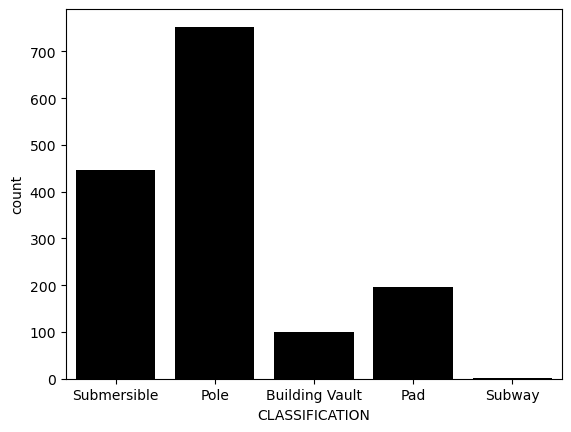

In [13]:
sns.countplot(data=df, x = "CLASSIFICATION", color="black")

<Axes: xlabel='PHASE', ylabel='count'>

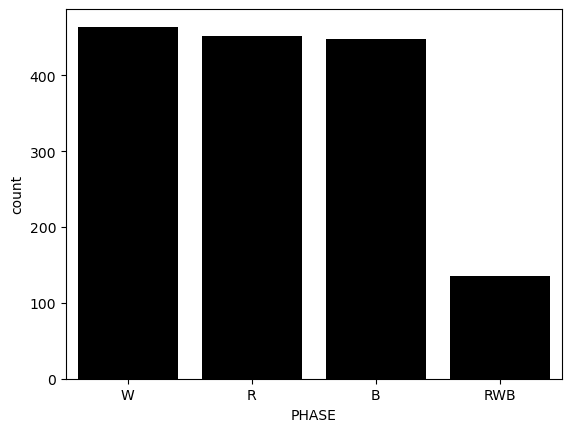

In [14]:
sns.countplot(data=df, x = "PHASE", color="black")

<Axes: xlabel='PCB', ylabel='count'>

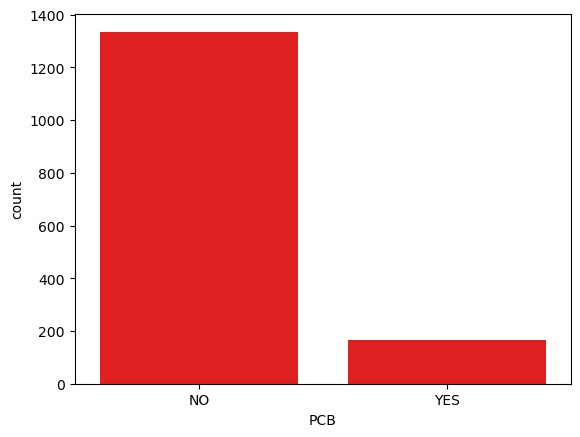

In [15]:
sns.countplot(data=df, x = "PCB", color="red")

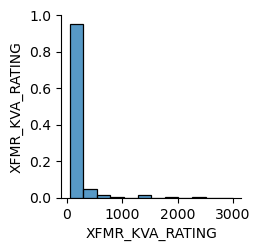

In [16]:
columns_to_plot = ['XFMR_KVA_RATING', 'YEAR']
sns.pairplot(df[columns_to_plot])
plt.show()

In [17]:
df_copy = df.set_index('YEAR')

In [18]:
df['YEAR'].max()

'2022'

In [19]:
df['YEAR'].min()

'1900'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NameID             1499 non-null   object 
 1   XFMR_KVA_RATING    1499 non-null   float64
 2   PRIMARY_VOLTAGE    1499 non-null   object 
 3   CLASSIFICATION     1499 non-null   object 
 4   PCB                1499 non-null   object 
 5   PHASE              1499 non-null   object 
 6   NO_CUSTOMERS       1499 non-null   int64  
 7   INSTALLATION_DATE  1499 non-null   object 
 8   YEAR               1499 non-null   object 
 9   MONTH              1499 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 117.2+ KB


In [21]:
df['YEAR'] = df['YEAR'].astype(str).astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NameID             1499 non-null   object 
 1   XFMR_KVA_RATING    1499 non-null   float64
 2   PRIMARY_VOLTAGE    1499 non-null   object 
 3   CLASSIFICATION     1499 non-null   object 
 4   PCB                1499 non-null   object 
 5   PHASE              1499 non-null   object 
 6   NO_CUSTOMERS       1499 non-null   int64  
 7   INSTALLATION_DATE  1499 non-null   object 
 8   YEAR               1499 non-null   int32  
 9   MONTH              1499 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 111.4+ KB


In [23]:
df['YEAR_RANGE'] = df['YEAR'].apply(lambda x: f'{(x//4) * 4} - {(x//4) * 4 + 3}')
df.head(20)

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH,YEAR_RANGE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,2006,10,2004 - 2007
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,2006,10,2004 - 2007
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,2010,02,2008 - 2011
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,1989,10,1988 - 1991
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,1978,08,1976 - 1979
5,TX1635,75.0,13.8/8kV,Pole,NO,W,60,1993-12-01 11:46,1993,12,1992 - 1995
6,TX1817,50.0,13.8/8kV,Pole,NO,W,32,1983-06-24 11:41,1983,06,1980 - 1983
7,TX1236,75.0,13.8/8kV,Pole,NO,W,60,1983-06-24 12:39,1983,06,1980 - 1983
8,TX1696,50.0,13.8/8kV,Pole,NO,B,35,1990-08-29 14:34,1990,08,1988 - 1991
9,TX1475,50.0,13.8/8kV,Pole,NO,W,21,1992-01-02 19:40,1992,01,1992 - 1995


In [24]:
year_range_customers = df.groupby('YEAR_RANGE')['NO_CUSTOMERS'].sum().reset_index()

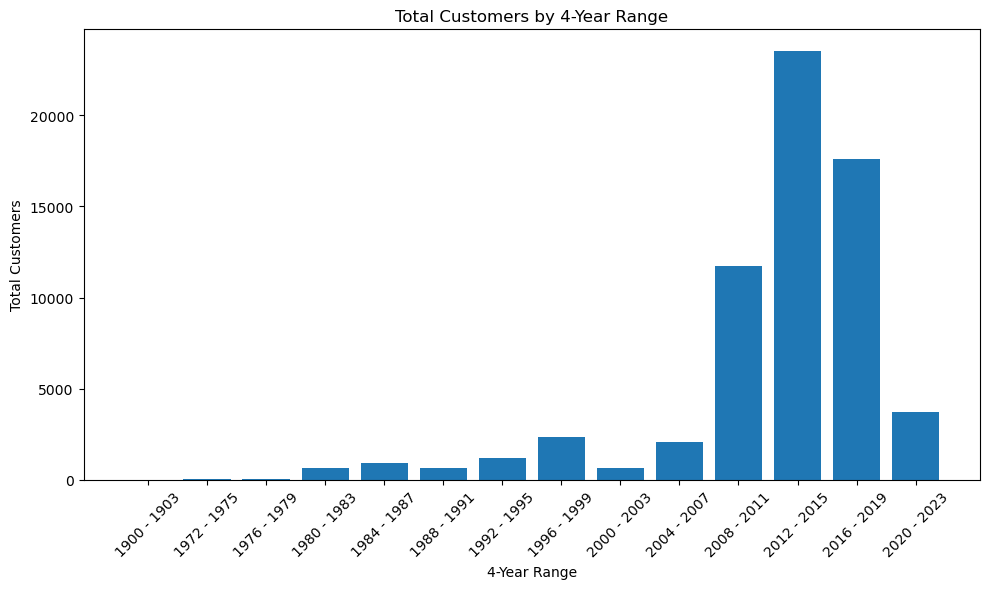

In [25]:
plt.figure(figsize = (10, 6))
plt.bar(year_range_customers['YEAR_RANGE'], year_range_customers['NO_CUSTOMERS'])
plt.xlabel('4-Year Range')
plt.ylabel('Total Customers')
plt.title('Total Customers by 4-Year Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH,YEAR_RANGE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,2006,10,2004 - 2007
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,2006,10,2004 - 2007
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,2010,02,2008 - 2011
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,1989,10,1988 - 1991
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,1978,08,1976 - 1979


In [27]:
df[['LOWER_VOLTAGE','UPPER_VOLTAGE']] = df['PRIMARY_VOLTAGE'].str.split('/', expand = True)

In [28]:
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH,YEAR_RANGE,LOWER_VOLTAGE,UPPER_VOLTAGE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,2006,10,2004 - 2007,27.6,16kV
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,2006,10,2004 - 2007,27.6,16kV
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,2010,02,2008 - 2011,16kV,None
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,1989,10,1988 - 1991,27.6,16kV
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,1978,08,1976 - 1979,16kV,None


In [29]:
unique_values = df['LOWER_VOLTAGE'].unique()
print(unique_values)

unique_values1 = df['UPPER_VOLTAGE'].unique()
print(unique_values1)

['27.6' '16kV' '13.8' '8kV' '2.4kV' '13.8kV (delta)' '4.16' '16kv' '16KV']
['16kV' None '8kV' '2.4kV']


In [30]:
for col in df.columns:
    df['LOWER_VOLTAGE'] = df['LOWER_VOLTAGE'].apply(lambda x: ''.join([char for char in x if char.isdigit() or char == "."]))

In [31]:
df.head(20)

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH,YEAR_RANGE,LOWER_VOLTAGE,UPPER_VOLTAGE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,2006,10,2004 - 2007,27.6,16kV
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,2006,10,2004 - 2007,27.6,16kV
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,2010,02,2008 - 2011,16,None
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,1989,10,1988 - 1991,27.6,16kV
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,1978,08,1976 - 1979,16,None
5,TX1635,75.0,13.8/8kV,Pole,NO,W,60,1993-12-01 11:46,1993,12,1992 - 1995,13.8,8kV
6,TX1817,50.0,13.8/8kV,Pole,NO,W,32,1983-06-24 11:41,1983,06,1980 - 1983,13.8,8kV
7,TX1236,75.0,13.8/8kV,Pole,NO,W,60,1983-06-24 12:39,1983,06,1980 - 1983,13.8,8kV
8,TX1696,50.0,13.8/8kV,Pole,NO,B,35,1990-08-29 14:34,1990,08,1988 - 1991,13.8,8kV
9,TX1475,50.0,13.8/8kV,Pole,NO,W,21,1992-01-02 19:40,1992,01,1992 - 1995,13.8,8kV


In [32]:
df['LOWER_VOLTAGE'] = df['LOWER_VOLTAGE'].apply(lambda x: x if x.endswith("kV") else f"{x}kV")
df.head(10)

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH,YEAR_RANGE,LOWER_VOLTAGE,UPPER_VOLTAGE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,2006,10,2004 - 2007,27.6kV,16kV
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,2006,10,2004 - 2007,27.6kV,16kV
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,2010,02,2008 - 2011,16kV,None
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,1989,10,1988 - 1991,27.6kV,16kV
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,1978,08,1976 - 1979,16kV,None
5,TX1635,75.0,13.8/8kV,Pole,NO,W,60,1993-12-01 11:46,1993,12,1992 - 1995,13.8kV,8kV
6,TX1817,50.0,13.8/8kV,Pole,NO,W,32,1983-06-24 11:41,1983,06,1980 - 1983,13.8kV,8kV
7,TX1236,75.0,13.8/8kV,Pole,NO,W,60,1983-06-24 12:39,1983,06,1980 - 1983,13.8kV,8kV
8,TX1696,50.0,13.8/8kV,Pole,NO,B,35,1990-08-29 14:34,1990,08,1988 - 1991,13.8kV,8kV
9,TX1475,50.0,13.8/8kV,Pole,NO,W,21,1992-01-02 19:40,1992,01,1992 - 1995,13.8kV,8kV


In [33]:
df['UPPER_VOLTAGE'] = df['UPPER_VOLTAGE'].apply(lambda x: 0 if x == None else x)
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH,YEAR_RANGE,LOWER_VOLTAGE,UPPER_VOLTAGE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,2006,10,2004 - 2007,27.6kV,16kV
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,2006,10,2004 - 2007,27.6kV,16kV
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,2010,02,2008 - 2011,16kV,0
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,1989,10,1988 - 1991,27.6kV,16kV
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,1978,08,1976 - 1979,16kV,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NameID             1499 non-null   object 
 1   XFMR_KVA_RATING    1499 non-null   float64
 2   PRIMARY_VOLTAGE    1499 non-null   object 
 3   CLASSIFICATION     1499 non-null   object 
 4   PCB                1499 non-null   object 
 5   PHASE              1499 non-null   object 
 6   NO_CUSTOMERS       1499 non-null   int64  
 7   INSTALLATION_DATE  1499 non-null   object 
 8   YEAR               1499 non-null   int32  
 9   MONTH              1499 non-null   object 
 10  YEAR_RANGE         1499 non-null   object 
 11  LOWER_VOLTAGE      1499 non-null   object 
 12  UPPER_VOLTAGE      1499 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 146.5+ KB


In [35]:
df['LOWER_VOLTAGE'] = df['LOWER_VOLTAGE'].str.replace('kV', '')
df['UPPER_VOLTAGE'] = df['UPPER_VOLTAGE'].str.replace('kV', '')

In [36]:
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH,YEAR_RANGE,LOWER_VOLTAGE,UPPER_VOLTAGE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 9:48,2006,10,2004 - 2007,27.6,16
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 9:48,2006,10,2004 - 2007,27.6,16
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43,2010,02,2008 - 2011,16,NaN
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 9:05,1989,10,1988 - 1991,27.6,16
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54,1978,08,1976 - 1979,16,NaN


In [37]:
df['LOWER_VOLTAGE'] = df['LOWER_VOLTAGE'].astype(str).astype(float)

In [38]:
df['UPPER_VOLTAGE'] = df['UPPER_VOLTAGE'].astype(str).astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NameID             1499 non-null   object 
 1   XFMR_KVA_RATING    1499 non-null   float64
 2   PRIMARY_VOLTAGE    1499 non-null   object 
 3   CLASSIFICATION     1499 non-null   object 
 4   PCB                1499 non-null   object 
 5   PHASE              1499 non-null   object 
 6   NO_CUSTOMERS       1499 non-null   int64  
 7   INSTALLATION_DATE  1499 non-null   object 
 8   YEAR               1499 non-null   int32  
 9   MONTH              1499 non-null   object 
 10  YEAR_RANGE         1499 non-null   object 
 11  LOWER_VOLTAGE      1499 non-null   float64
 12  UPPER_VOLTAGE      300 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 146.5+ KB


In [40]:
df['MONTH'] = df['MONTH'].astype(str).astype(int)

In [41]:
df['INSTALLATION_DATE'] = pd.to_datetime(df['INSTALLATION_DATE'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   NameID             1499 non-null   object        
 1   XFMR_KVA_RATING    1499 non-null   float64       
 2   PRIMARY_VOLTAGE    1499 non-null   object        
 3   CLASSIFICATION     1499 non-null   object        
 4   PCB                1499 non-null   object        
 5   PHASE              1499 non-null   object        
 6   NO_CUSTOMERS       1499 non-null   int64         
 7   INSTALLATION_DATE  1499 non-null   datetime64[ns]
 8   YEAR               1499 non-null   int32         
 9   MONTH              1499 non-null   int32         
 10  YEAR_RANGE         1499 non-null   object        
 11  LOWER_VOLTAGE      1499 non-null   float64       
 12  UPPER_VOLTAGE      300 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(6)

In [43]:
df.to_csv('AIA_cleaned_data.csv', index = False)

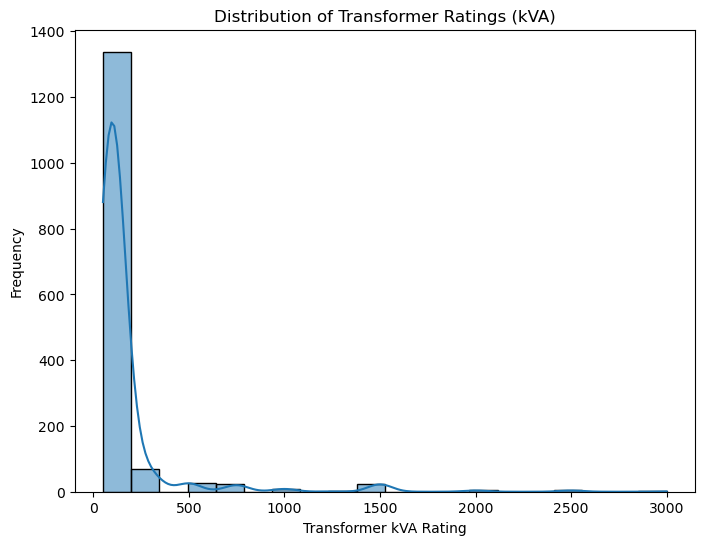

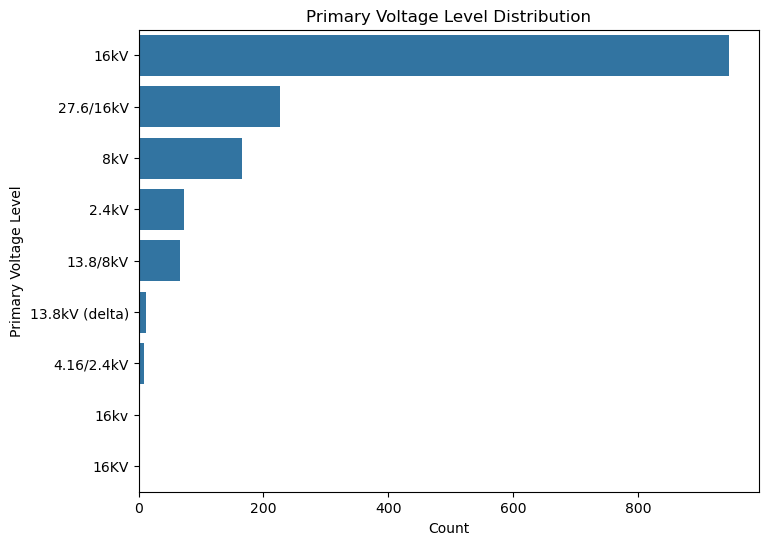

{'peak_transformer_rating_kVA': 100.0, 'avg_transformer_rating_kVA': 167.18278852568378, 'most_common_voltage': '16kV', 'most_common_voltage_count': 945}


In [44]:
# 1. Distribution of Transformer Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['XFMR_KVA_RATING'], kde=True, bins=20)
plt.title("Distribution of Transformer Ratings (kVA)")
plt.xlabel("Transformer kVA Rating")
plt.ylabel("Frequency")
plt.show()

results = {}

peak_rating = df['XFMR_KVA_RATING'].mode()[0]
avg_rating = df['XFMR_KVA_RATING'].mean()
results['peak_transformer_rating_kVA'] = peak_rating
results['avg_transformer_rating_kVA'] = avg_rating

# 2. Primary Voltage Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y=df['PRIMARY_VOLTAGE'], order=df['PRIMARY_VOLTAGE'].value_counts().index)
plt.title("Primary Voltage Level Distribution")
plt.xlabel("Count")
plt.ylabel("Primary Voltage Level")
plt.show()

primary_voltage_counts = df['PRIMARY_VOLTAGE'].value_counts()
most_common_voltage = primary_voltage_counts.idxmax()
most_common_voltage_count = primary_voltage_counts.max()
results['most_common_voltage'] = most_common_voltage
results['most_common_voltage_count'] = most_common_voltage_count

print(results)

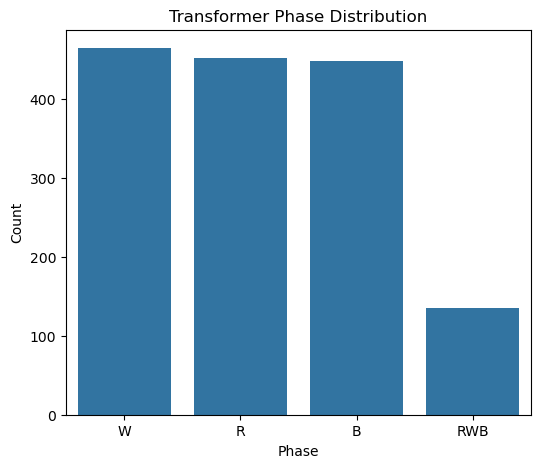

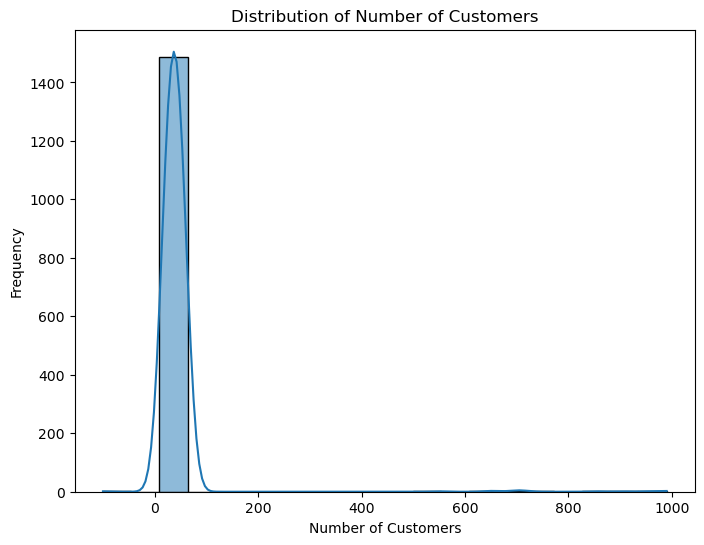

{'peak_transformer_rating_kVA': 100.0, 'avg_transformer_rating_kVA': 167.18278852568378, 'most_common_voltage': '16kV', 'most_common_voltage_count': 945, 'most_common_phase': 'W', 'most_common_phase_count': 464, 'peak_customers_served': 35, 'avg_customers_served': 43.500333555703804}


In [45]:
# 3. Transformer Phase Distribution
plt.figure(figsize=(6, 5))
sns.countplot(x=df['PHASE'], order=df['PHASE'].value_counts().index)
plt.title("Transformer Phase Distribution")
plt.xlabel("Phase")
plt.ylabel("Count")
plt.show()

reuslts = {}

phase_counts = df['PHASE'].value_counts()
most_common_phase = phase_counts.idxmax()
most_common_phase_count = phase_counts.max()
results['most_common_phase'] = most_common_phase
results['most_common_phase_count'] = most_common_phase_count

# 4. Number of Customers Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['NO_CUSTOMERS'], kde=True, bins=20)
plt.title("Distribution of Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("Frequency")
plt.show()

peak_customers = df['NO_CUSTOMERS'].mode()[0]
avg_customers = df['NO_CUSTOMERS'].mean()
results['peak_customers_served'] = peak_customers
results['avg_customers_served'] = avg_customers

print(results)

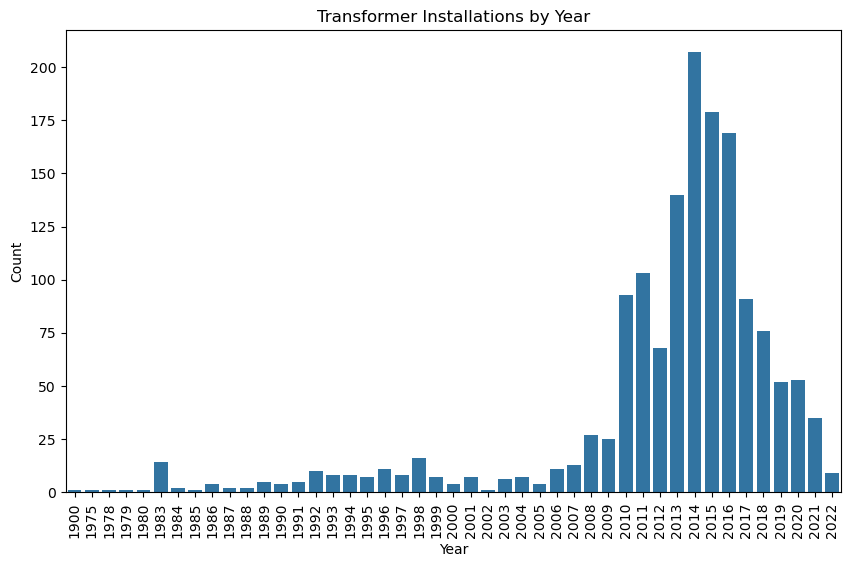

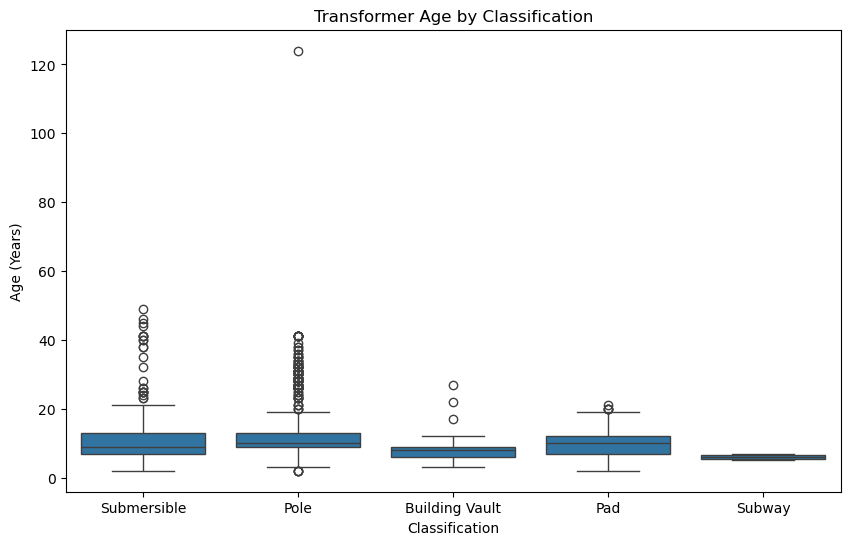

{'peak_installation_year': 2014, 'peak_installation_count': 207, 'oldest_transformer_age': 124, 'youngest_transformer_age': 2, 'avg_transformer_age': 11.651767845230154}


In [46]:
# 5. Installation Year Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x=df['YEAR'], order=sorted(df['YEAR'].unique()))
plt.xticks(rotation=90)
plt.title("Transformer Installations by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

results = {}

installation_year_counts = df['YEAR'].value_counts()
peak_installation_year = installation_year_counts.idxmax()
peak_installation_count = installation_year_counts.max()
results['peak_installation_year'] = peak_installation_year
results['peak_installation_count'] = peak_installation_count

# 6. Box Plot for Transformer Age vs. Classification
# Calculate Transformer Age (assuming current year is 2024)
df['AGE'] = 2024 - df['YEAR']
plt.figure(figsize=(10, 6))
sns.boxplot(x='CLASSIFICATION', y='AGE', data=df)
plt.title("Transformer Age by Classification")
plt.xlabel("Classification")
plt.ylabel("Age (Years)")
plt.show()

df['AGE'] = 2024 - df['YEAR']
oldest_transformer_age = df['AGE'].max()
youngest_transformer_age = df['AGE'].min()
avg_transformer_age = df['AGE'].mean()
results['oldest_transformer_age'] = oldest_transformer_age
results['youngest_transformer_age'] = youngest_transformer_age
results['avg_transformer_age'] = avg_transformer_age

print(results)

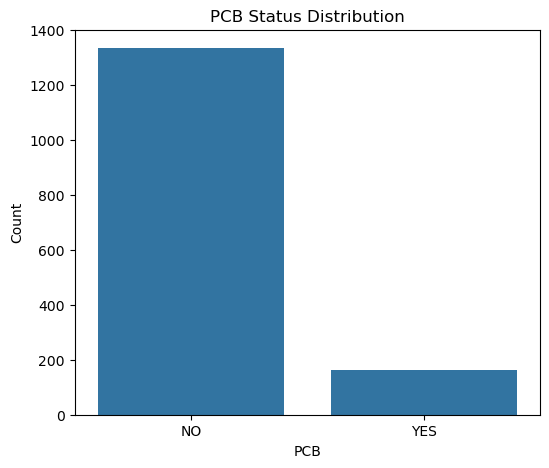

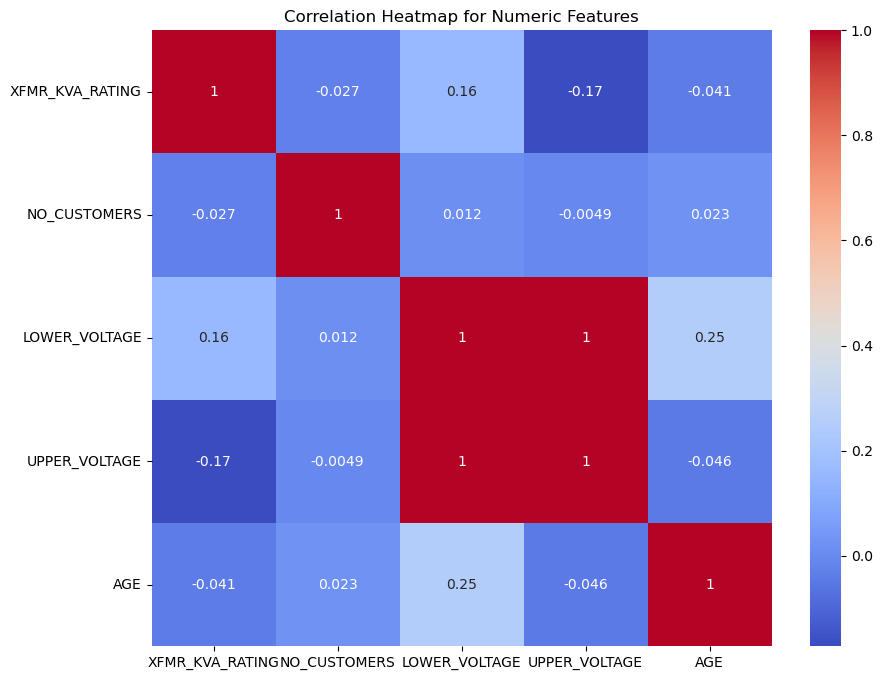

{'pcb_status_most_common': 'NO', 'pcb_status_count': 1335, 'top_correlated_features': ('LOWER_VOLTAGE', 'UPPER_VOLTAGE'), 'top_correlation_value': 0.9999999096154167}


In [47]:
# 7. PCB Status Analysis
plt.figure(figsize=(6, 5))
sns.countplot(x=df['PCB'], order=df['PCB'].value_counts().index)
plt.title("PCB Status Distribution")
plt.xlabel("PCB")
plt.ylabel("Count")
plt.show()

results = {}

pcb_counts = df['PCB'].value_counts()
pcb_status_most_common = pcb_counts.idxmax()
pcb_status_count = pcb_counts.max()
results['pcb_status_most_common'] = pcb_status_most_common
results['pcb_status_count'] = pcb_status_count

# 8. Correlation Heatmap for Numeric Features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['XFMR_KVA_RATING', 'NO_CUSTOMERS', 'LOWER_VOLTAGE', 'UPPER_VOLTAGE', 'AGE']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

correlations = df[['XFMR_KVA_RATING', 'NO_CUSTOMERS', 'LOWER_VOLTAGE', 'UPPER_VOLTAGE', 'AGE']].corr()
top_correlated_pair = correlations.unstack().sort_values(ascending=False).drop_duplicates().iloc[1:2]
top_correlated_features = top_correlated_pair.index[0]
top_correlation_value = top_correlated_pair.values[0]
results['top_correlated_features'] = top_correlated_features
results['top_correlation_value'] = top_correlation_value

print(results)

## Starting with the Machine Learning Modeling. 

Our First Problem/Objective is Load Prediction - We will predict the TX load based off the number of customers and the age of TX.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [49]:
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH,YEAR_RANGE,LOWER_VOLTAGE,UPPER_VOLTAGE,AGE
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 09:48:00,2006,10,2004 - 2007,27.6,16.0,18
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 09:48:00,2006,10,2004 - 2007,27.6,16.0,18
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43:00,2010,2,2008 - 2011,16.0,NaN,14
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 09:05:00,1989,10,1988 - 1991,27.6,16.0,35
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54:00,1978,8,1976 - 1979,16.0,NaN,46


In [50]:
df['UPPER_VOLTAGE'] = df['UPPER_VOLTAGE'].fillna(0)

In [51]:
df.isna().sum()

NameID               0
XFMR_KVA_RATING      0
PRIMARY_VOLTAGE      0
CLASSIFICATION       0
PCB                  0
PHASE                0
NO_CUSTOMERS         0
INSTALLATION_DATE    0
YEAR                 0
MONTH                0
YEAR_RANGE           0
LOWER_VOLTAGE        0
UPPER_VOLTAGE        0
AGE                  0
dtype: int64

In [52]:
df['CUSTOMER_DENSITY'] = df['NO_CUSTOMERS']/df['XFMR_KVA_RATING']

In [53]:
df.head()

,NameID,XFMR_KVA_RATING,PRIMARY_VOLTAGE,CLASSIFICATION,PCB,PHASE,NO_CUSTOMERS,INSTALLATION_DATE,YEAR,MONTH,YEAR_RANGE,LOWER_VOLTAGE,UPPER_VOLTAGE,AGE,CUSTOMER_DENSITY
0,TX1633,200.0,27.6/16kV,Submersible,NO,W,46,2006-10-04 09:48:00,2006,10,2004 - 2007,27.6,16.0,18,0.230000
1,TX1783,200.0,27.6/16kV,Submersible,NO,R,33,2006-10-04 09:48:00,2006,10,2004 - 2007,27.6,16.0,18,0.165000
2,TX1607,167.0,16kV,Submersible,NO,B,52,2010-02-21 10:43:00,2010,2,2008 - 2011,16.0,0.0,14,0.311377
3,TX2067,100.0,27.6/16kV,Submersible,NO,B,30,1989-10-31 09:05:00,1989,10,1988 - 1991,27.6,16.0,35,0.300000
4,TX2459,1000.0,16kV,Submersible,NO,W,38,1978-08-23 13:54:00,1978,8,1976 - 1979,16.0,0.0,46,0.038000


In [54]:
features = ['XFMR_KVA_RATING', 'PRIMARY_VOLTAGE', 'CLASSIFICATION', 'PCB', 'PHASE', 'AGE', 'CUSTOMER_DENSITY', 'UPPER_VOLTAGE', 'LOWER_VOLTAGE']
target = 'NO_CUSTOMERS'

In [55]:
X = df[features]
y = df[target]

In [56]:
# Preprocessing: One-hot encoding for categorical, scaling for numerical
categorical_features = ['PRIMARY_VOLTAGE', 'CLASSIFICATION', 'PCB', 'PHASE']
numerical_features = ['XFMR_KVA_RATING', 'AGE', 'CUSTOMER_DENSITY', 'LOWER_VOLTAGE', 'UPPER_VOLTAGE']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [57]:
# Split the date
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2992.8885514166213
R^2 Score: 0.7437588095737899


In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

print(f"Best Random Forest R^2: {grid_rf.best_score_}")
print(f"Best Random Forest Params: {grid_rf.best_params_}")

Best Random Forest R^2: 0.9770026307683551
Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [61]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
grid_gb = GridSearchCV(gb, gb_params, cv=5, scoring='r2')
grid_gb.fit(X_train, y_train)

print(f"Best Gradient Boosting R^2: {grid_gb.best_score_}")
print(f"Best Gradient Boosting Params: {grid_gb.best_params_}")

Best Gradient Boosting R^2: 0.990811380163338
Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [302]:
# Feature importance for the best Gradient Boosting model
feature_importances = grid_gb.best_estimator_.feature_importances_
features = preprocessor.transformers_[0][1].get_feature_names_out(numerical_features) + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Gradient Boosting Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Residual Analysis
y_pred_gb = grid_gb.best_estimator_.predict(X_test)
residuals = y_test - y_pred_gb

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Residuals Distribution - Gradient Boosting Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

ValueError: operands could not be broadcast together with shapes (5,) (20,) 